# House Price Prediction using Machine Learning in Python![imageedit.jpg](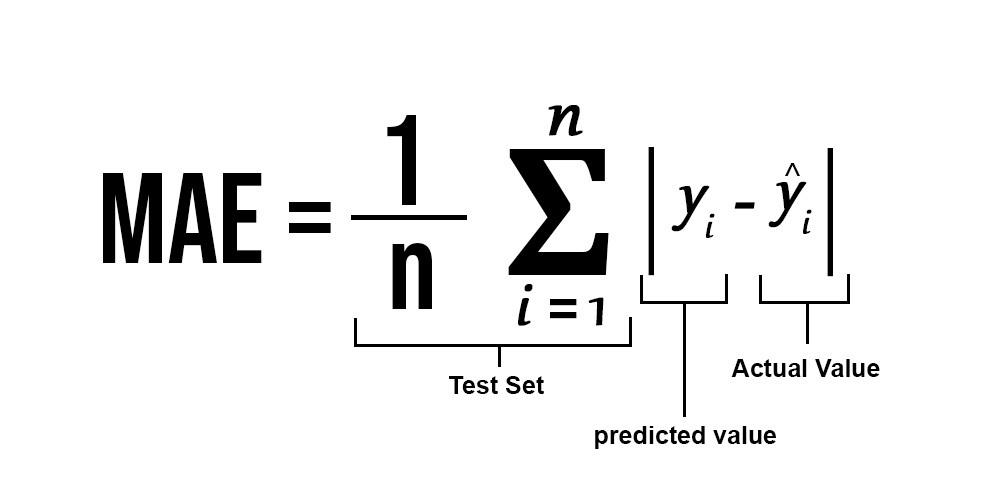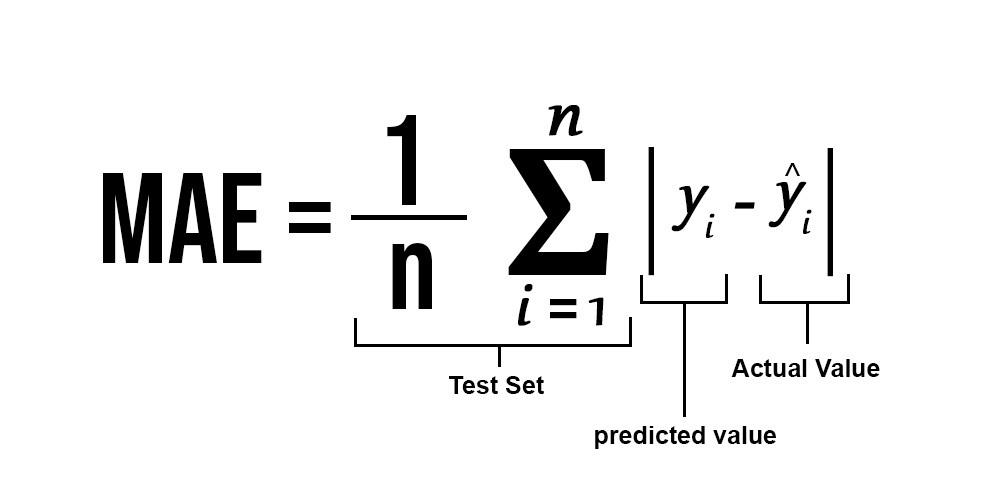)

## 1. Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel("drive/MyDrive/HousePricePrediction/HousePricePrediction.xlsx")

In [5]:
## First 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [6]:
# Shape of data
data.shape

(2919, 13)

### Data Preprocessing
I will categorize the features depending on their datatype(int, float, object) and then calsculate the number of them

In [8]:
# Get the column names for each data type
object_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(include='int').columns
fl_cols = data.select_dtypes(include='float').columns

# Print the number of each type of variable
print(f"Categorical variables: {len(object_cols)}")
print(f"Integer variables: {len(num_cols)}")
print(f"Float variables: {len(fl_cols)}")


Categorical variables: 4
Integer variables: 6
Float variables: 3


## Exploratory Data Analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


## Heatmap

<ipython-input-11-51b985f2144f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'BrBG',


<Axes: >

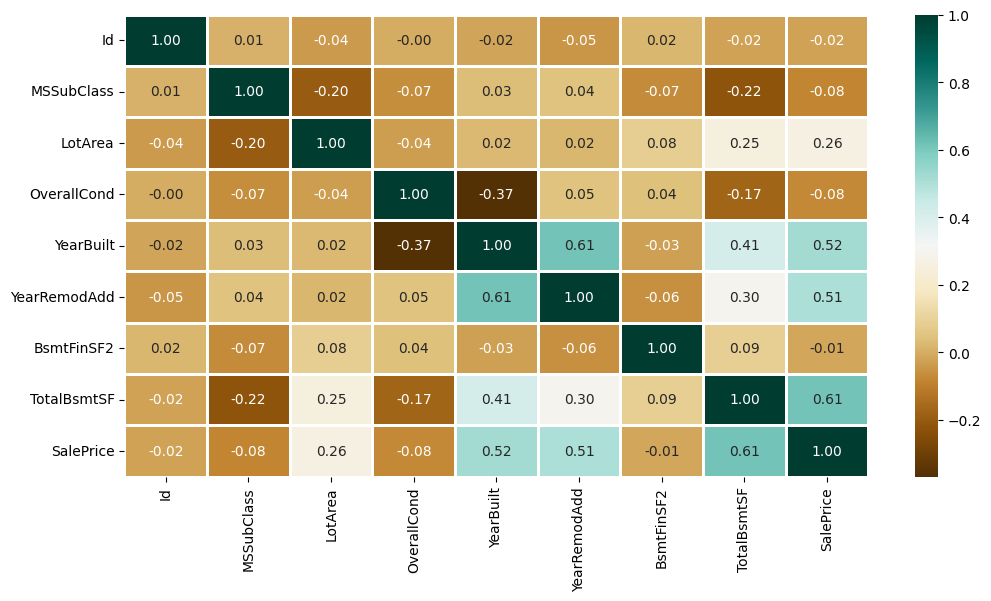

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap = 'BrBG',
            fmt = ".2f",
            linewidths = 2,
            annot = True)

## Barplot

<Axes: title={'center': 'No .Unique Values of Categorical Features'}, xlabel='None'>

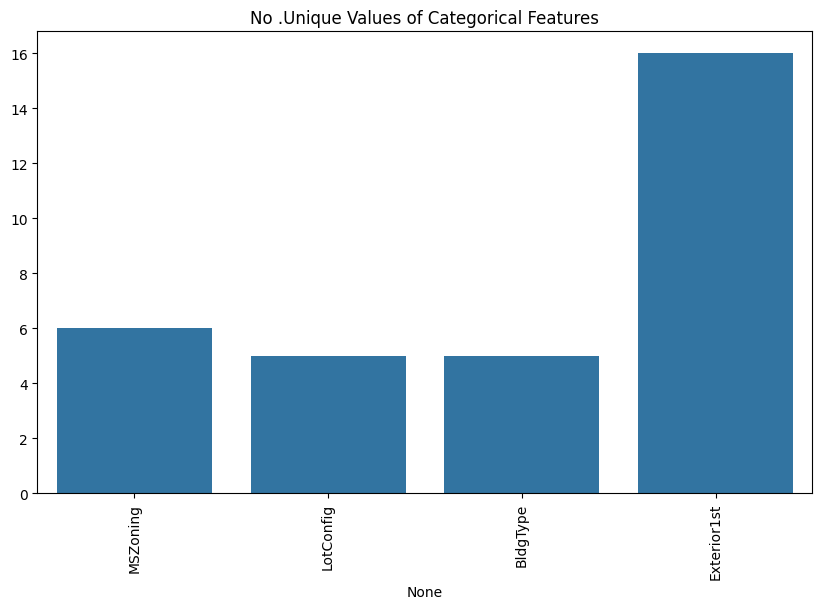

In [12]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)

plt.figure(figsize=(10,6))
plt.title('No .Unique Values of Categorical Features')
plt.xticks(rotation = 90)
sns.barplot(x=object_cols,y=unique_values)

 The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category I can plot the bargraph of each four features separately.

<ipython-input-14-9f4842450ac7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, ax=ax, palette='hsv')
<ipython-input-14-9f4842450ac7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-14-9f4842450ac7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, ax=ax, palette='hsv')
<ipython-input-14-9f4842450ac7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-14-9f4842450ac7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

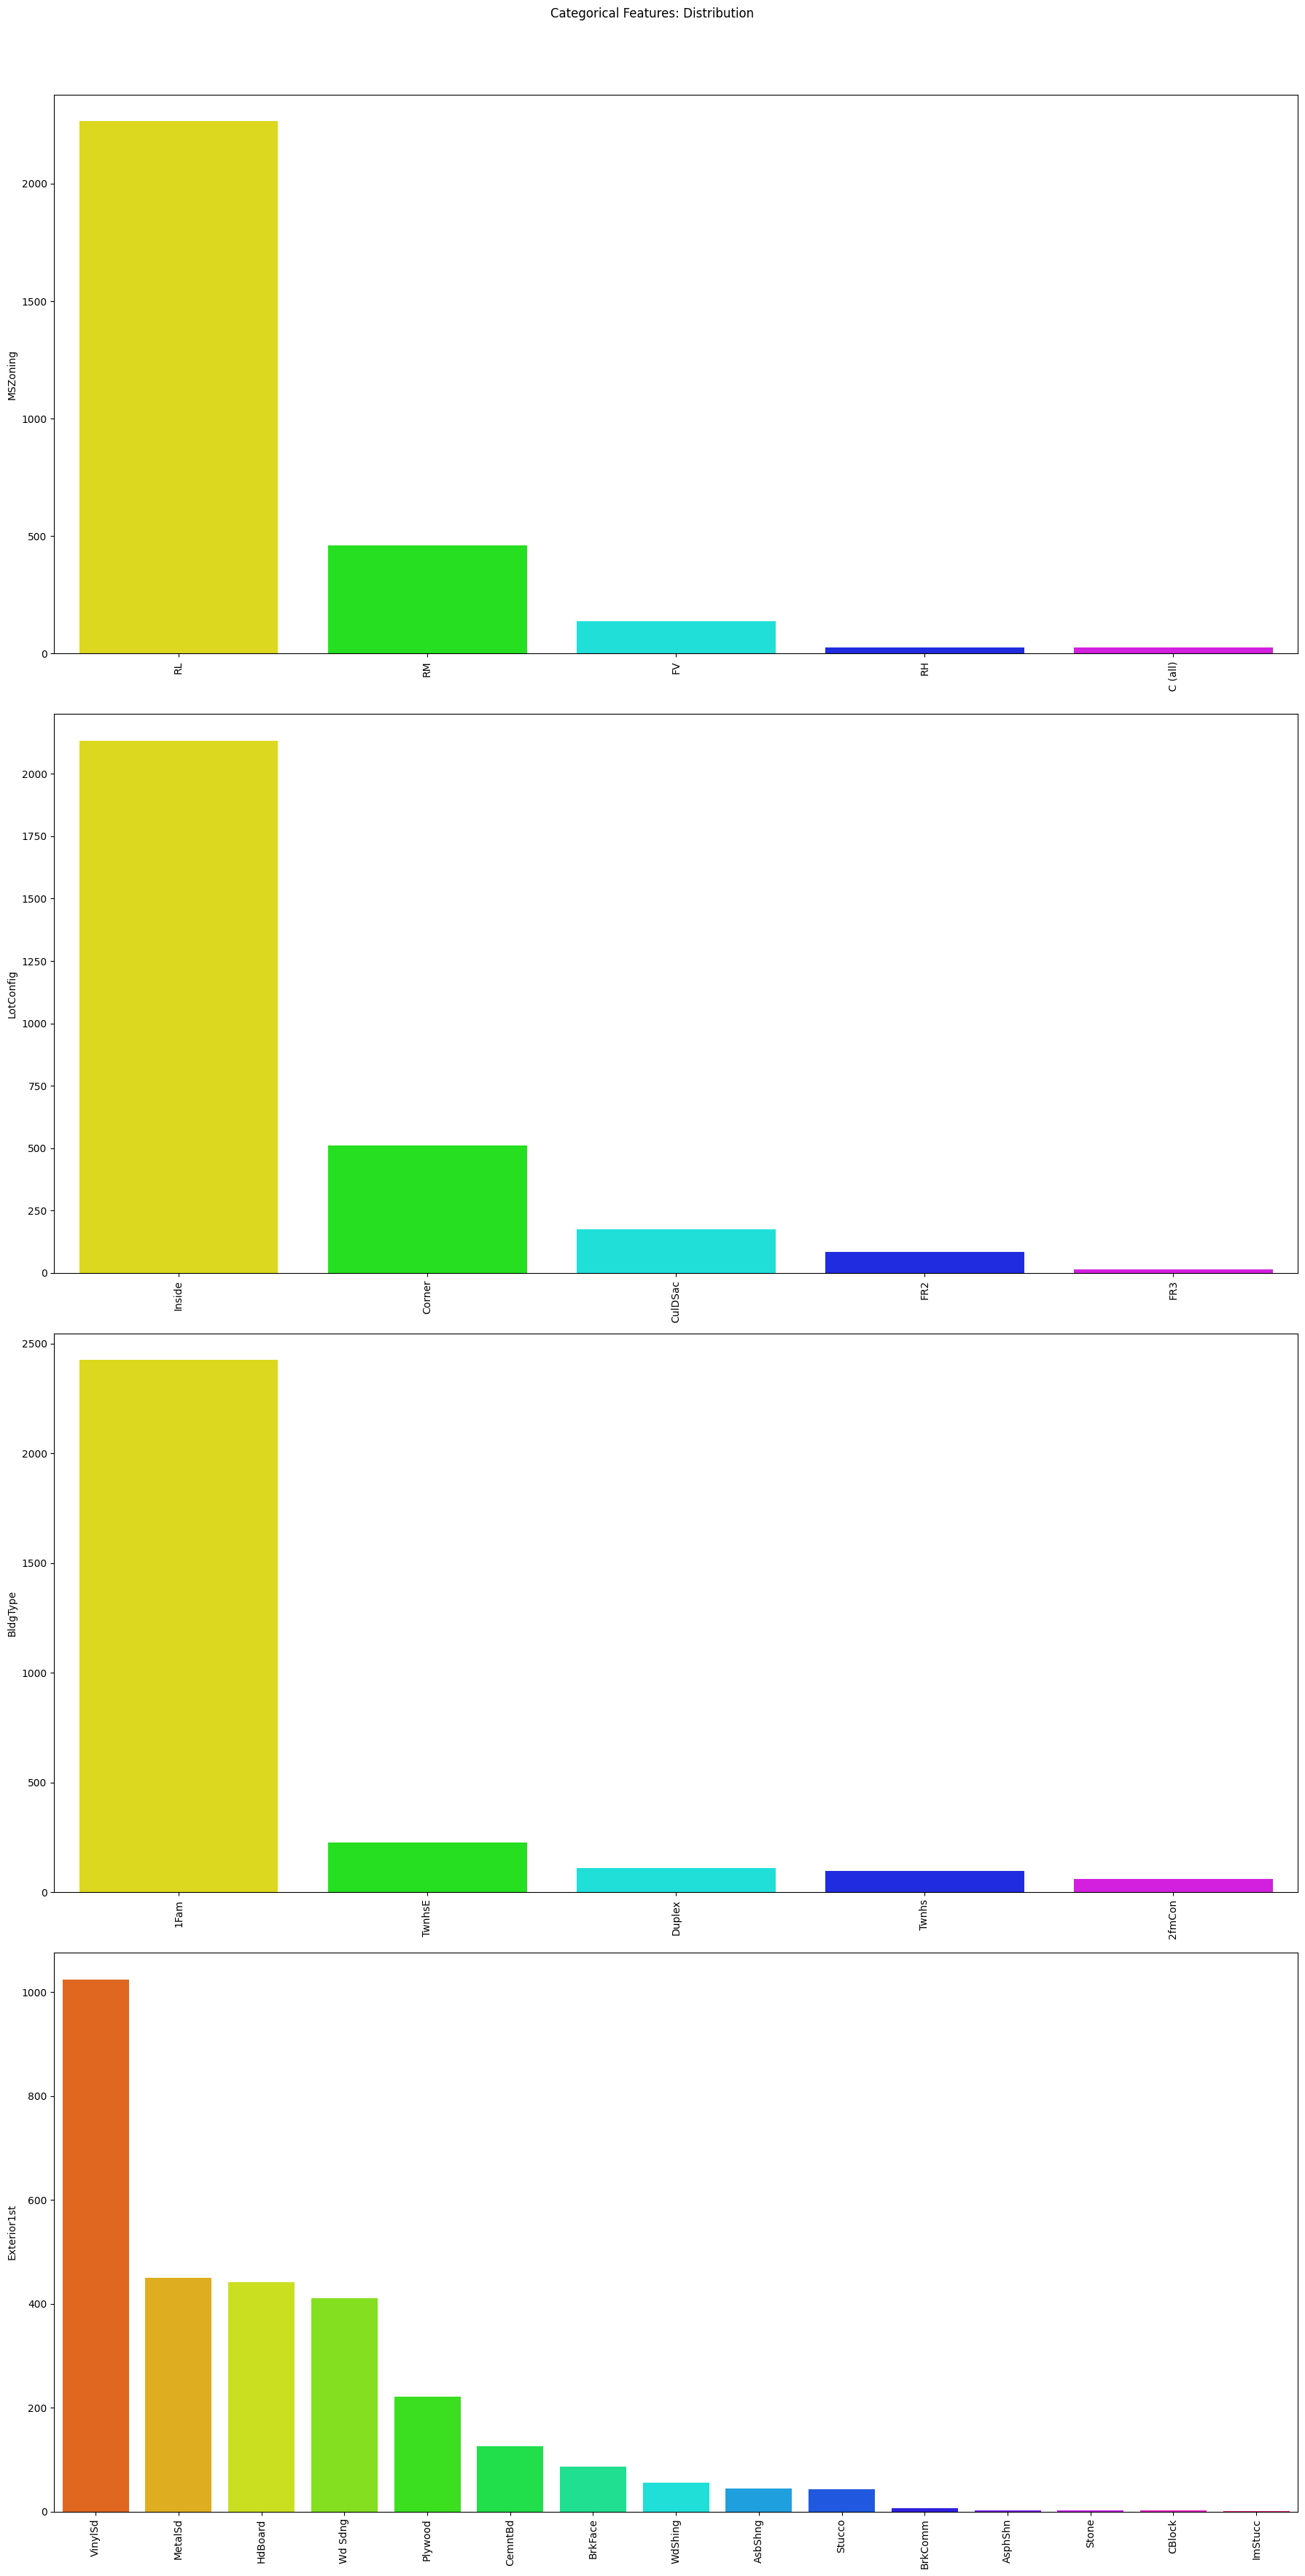

In [14]:
fig, axes = plt.subplots(len(object_cols), 1, figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution')

for ax, col in zip(axes.flatten(), object_cols):
    y = data[col].value_counts()
    sns.barplot(x=list(y.index), y=y, ax=ax, palette='hsv')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title


## Data Cleaning
In our dataset, there are some columns that are not important and irrelevant for the model training. So, I can drop that column before training.

As Id Column will not be participating in any prediction. So I can Drop it.

In [15]:
data.drop(['Id'],axis = 1, inplace =True)

In [18]:
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

Replacing SalePrice Empty values with their mean values.

In [19]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [22]:
# Drop records with null values
new_data = data.dropna()

In [54]:
new_data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## OneHotEncoder – For Label categorical features


In [24]:
from sklearn.preprocessing import OneHotEncoder

object_cols = new_data.select_dtypes(include='object').columns
print("Categorical variables:", object_cols)
print('No. of. categorical features:', len(object_cols))


Categorical variables: Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
No. of. categorical features: 4


we can  now perform a OneHotEncoding

In [27]:
# Initialize the OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = OH_encoder.fit_transform(new_data[object_cols])

# Convert the numpy array back into a dataframe with the correct column names and index
OH_cols_df = pd.DataFrame(OH_cols, columns=OH_encoder.get_feature_names_out(object_cols), index=new_data.index)
# Drop the original categorical columns from the original dataframe.
df_final = pd.concat([new_data.drop(object_cols, axis=1), OH_cols_df], axis=1)

## Splitting Dataset into Traning and Testing
X and Y spliting (i.e Y is the SalePrice column and The rest of the Other Columns are X)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis = 1)
Y =  df_final['SalePrice']

# Split the training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size = 0.8, test_size = 0.2,  random_state = 20)

## Model and Accuracy
I will use 3 regression Models
  - SVM-Support Vector Machine
  - Random Forest Regressor
  - Linear Regressor
  - Cat Boost Regressor

To calculate Loss we will be using the Mean_absolute_Persentage_error module

### SVM - Support Vector Nachine

In [45]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR().fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

SVM_accuracy= mean_absolute_percentage_error(Y_valid, Y_pred)
print(SVM_accuracy)

0.17054583991574104


### Random Forest Regression

In [43]:
from  sklearn.ensemble import RandomForestRegressor as RR

model_RFR = RR(n_estimators = 10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)


RR_accuracy = mean_absolute_percentage_error(Y_valid, Y_pred)
print(RR_accuracy)

0.18728535755164913


### Linear Regression


In [44]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

lR_accuracy = mean_absolute_percentage_error(Y_valid, Y_pred)
print(lR_accuracy)

0.18697935434267113


### Cat Boost Regressor

In [42]:
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score = r2_score(Y_valid, preds)
print(cb_r2_score)


Learning rate set to 0.046797
0:	learn: 56643.8868898	total: 1.25ms	remaining: 1.24s
1:	learn: 55802.2770813	total: 2.46ms	remaining: 1.23s
2:	learn: 55087.2580417	total: 3.62ms	remaining: 1.2s
3:	learn: 54382.5902989	total: 4.87ms	remaining: 1.21s
4:	learn: 53735.4157889	total: 6.08ms	remaining: 1.21s
5:	learn: 53150.6150455	total: 7.28ms	remaining: 1.21s
6:	learn: 52526.6401427	total: 8.49ms	remaining: 1.2s
7:	learn: 52016.5666382	total: 9.83ms	remaining: 1.22s
8:	learn: 51479.2538858	total: 11.1ms	remaining: 1.23s
9:	learn: 51023.9678861	total: 12.4ms	remaining: 1.23s
10:	learn: 50610.0538726	total: 13.6ms	remaining: 1.22s
11:	learn: 50172.7715219	total: 14.9ms	remaining: 1.23s
12:	learn: 49821.5608046	total: 16.1ms	remaining: 1.22s
13:	learn: 49416.9200057	total: 17.3ms	remaining: 1.22s
14:	learn: 48927.3359132	total: 18.6ms	remaining: 1.22s
15:	learn: 48495.7726892	total: 19.8ms	remaining: 1.22s
16:	learn: 48166.8008007	total: 21.1ms	remaining: 1.22s
17:	learn: 47830.7059857	total

In [53]:
best_model = {'SVM Regresion':SVM_accuracy, 'Random Forest Regression': RR_accuracy, 'Linear Regression':lR_accuracy, 'Cat Boost Regressor':cb_r2_score}

best_model_name = min(best_model, key=best_model.get)
best_model_value = best_model[best_model_name]

print(best_model_name,':', best_model_value)

SVM Regresion : 0.17054583991574104
